In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
import matplotlib.colors as mcolors
from matplotlib.transforms import Bbox
from matplotlib.colors import to_rgba
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import scanpy as sc
import scanpy.external as sce
import scipy
import scipy.sparse as sp
import sklearn
from scipy.sparse import csr_matrix

from importlib import reload

# local imports
import utils as ut
import plotting as plt2

sc.settings.verbosity = 3  

# load the Data

In [2]:
fpath = "/scratch/indikar_root/indikar1/shared_data/sc_HSC/scanpy/native_hsc_sc_fib.h5ad"
adata = sc.read_h5ad(fpath)
adata.obs['UMAP 1'] = adata.obsm['X_umap'][:, 0]
adata.obs['UMAP 2'] = adata.obsm['X_umap'][:, 1]
adata.obs['hsc_cluster'] = adata.obs['new_cluster'].apply(lambda x: f"A{int(x) + 1}")
sc.logging.print_memory_usage()
adata

Memory usage: current 4.03 GB, difference +4.03 GB


AnnData object with n_obs × n_vars = 18688 × 8638
    obs: 'n_genes', 'dataset', 'n_genes_by_counts', 'total_counts', 'obs_index', 'cell_type', 'standard_cell_type', 'cell_id', 'cluster_str', 'merged_cluster', 'group', 'new_cluster', 'UMAP 1', 'UMAP 2', 'hsc_cluster'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'gene_id', 'token_id', 'gene_biotype', 'Chromosome', 'Start', 'End', 'hematopoietic_stem_cells_marker', 'fibroblasts_marker', 'lung_fibroblast_marker', 'fat_fibroblast_marker', 'pancreas_fibroblast_marker', 'bone_marrow_hematopoietic_stem_cell_marker', 'thymus_fibroblast_marker', 'lymph_node_hematopoietic_stem_cell_marker', 'prostate_fibroblast_marker', 'lung_alveolar_fibroblast_marker', 'heart_fibroblast_of_cardiac_tissue_marker', 'trachea_fibroblast_marker', 'eye_fibroblast_marker', 'uterus_fibroblast_marker', 'bladder_fibroblast_marker', 'small_intestine_fibroblast_marker', 'large_intestine_fibroblast_marker', 'blood_hematopoietic_stem

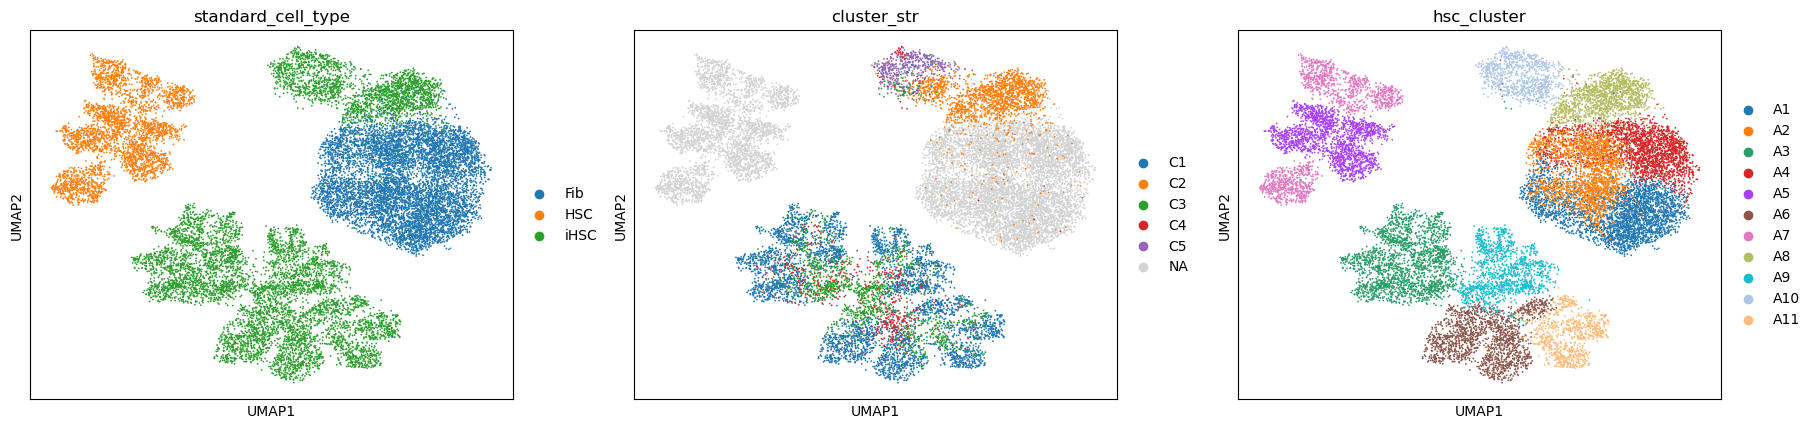

IOStream.flush timed out
IOStream.flush timed out


In [3]:
sc.pl.umap(
    adata,
    color=[
        'standard_cell_type',
        'cluster_str',
        'hsc_cluster',
    ],
)

,n_genes,dataset,n_genes_by_counts,total_counts,obs_index,cell_type,standard_cell_type,cell_id,cluster_str,merged_cluster,group,new_cluster,UMAP 1,UMAP 2,hsc_cluster
AAACAGCCAACCCTAA-3_weng_young2_HSC,1330,weng_young2_HSC,1949,11532.148941,AAACAGCCAACCCTAA-3,HSC,HSC,AAACAGCCAACCCTAA-3_weng_young2_HSC,NaN,NaN,HSC,4,-1.838361,6.591981,A5
AAACAGCCATAGGCGA-3_weng_young2_HSC,1001,weng_young2_HSC,1446,8973.424214,AAACAGCCATAGGCGA-3,HSC,HSC,AAACAGCCATAGGCGA-3_weng_young2_HSC,NaN,NaN,HSC,4,-1.560270,7.641628,A5
AAACATGCAGGCTGTT-3_weng_young2_HSC,1886,weng_young2_HSC,2755,15157.484346,AAACATGCAGGCTGTT-3,HSC,HSC,AAACATGCAGGCTGTT-3_weng_young2_HSC,NaN,NaN,HSC,6,-1.257942,9.828702,A7
AAACCGCGTCCTTAGT-3_weng_young2_HSC,1036,weng_young2_HSC,1520,9517.259525,AAACCGCGTCCTTAGT-3,HSC,HSC,AAACCGCGTCCTTAGT-3_weng_young2_HSC,NaN,NaN,HSC,6,0.079102,10.160742,A7
AAACCGCGTCCTTTAA-3_weng_young2_HSC,861,weng_young2_HSC,1256,7927.577202,AAACCGCGTCCTTTAA-3,HSC,HSC,AAACCGCGTCCTTTAA-3_weng_young2_HSC,NaN,NaN,HSC,4,-0.837442,5.698623,A5


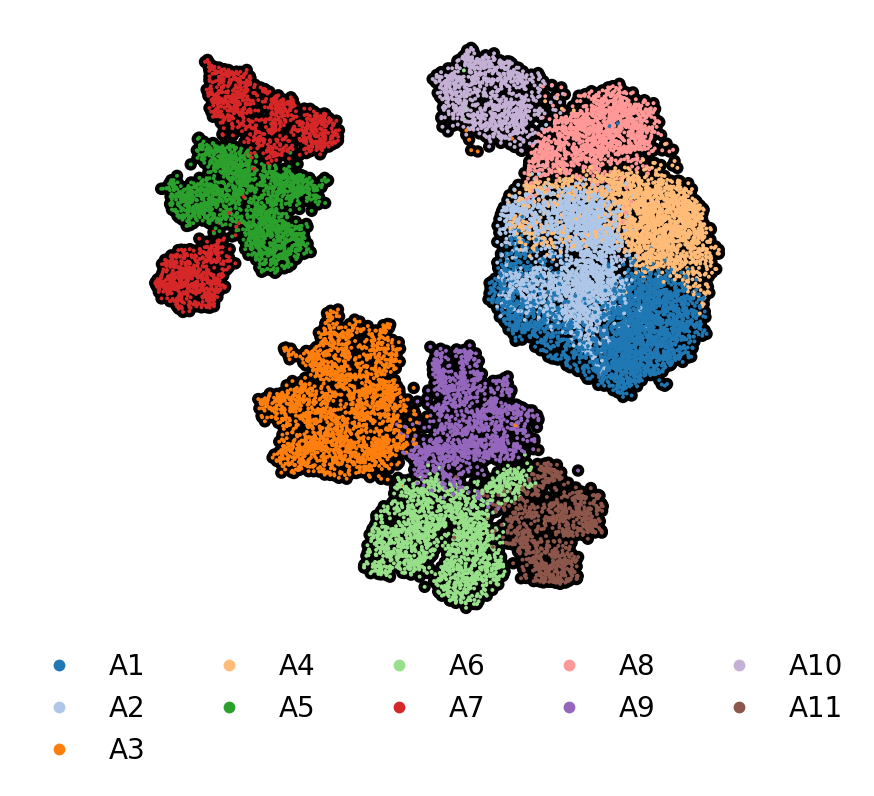

In [4]:
pdf = adata.obs.copy()

plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 4


sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=20,
    c='k',
)

sns.scatterplot(
    data=pdf,
    x='UMAP 1',
    y='UMAP 2',
    ec='none',
    s=2,
    hue='hsc_cluster',
    palette='tab20',
)

plt.xticks([])
plt.yticks([])

plt.ylabel('UMAP 2')
plt.xlabel('UMAP 1')
plt.gca().set_aspect('auto')
plt.axis(False)

sns.move_legend(
    plt.gca(),
    loc='lower center',
    title="",
    frameon=False,
    bbox_to_anchor=(0.5, -0.25),
    markerscale=3,
    ncol=5
)

pdf.head()